In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from keras.preprocessing.image import load_img
import matplotlib.image as mpimg
from keras.preprocessing.image import img_to_array, ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPool2D
from livelossplot.keras import PlotLossesCallback


In [4]:
train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input, horizontal_flip=True, vertical_flip=True)
train_generator = train_data_gen.flow_from_directory('/Users/stefanflorin/Downloads/chest_xray/train/',
                                                    target_size = (224, 224),
                                                    color_mode = 'grayscale',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 5216 images belonging to 2 classes.


In [5]:
val_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = val_data_gen.flow_from_directory('/Users/stefanflorin/Downloads/chest_xray/val/',
                                                       target_size = (224, 224),
                                                       color_mode = 'grayscale',
                                                       batch_size = 32,
                                                       class_mode = 'categorical',
                                                       shuffle = True)

Found 16 images belonging to 2 classes.


In [7]:
def plotImg(item_dir, top=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:top]
    
    plt.figure(figsize=(15,15))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5,5, idx+1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
    plt.tight_layout()

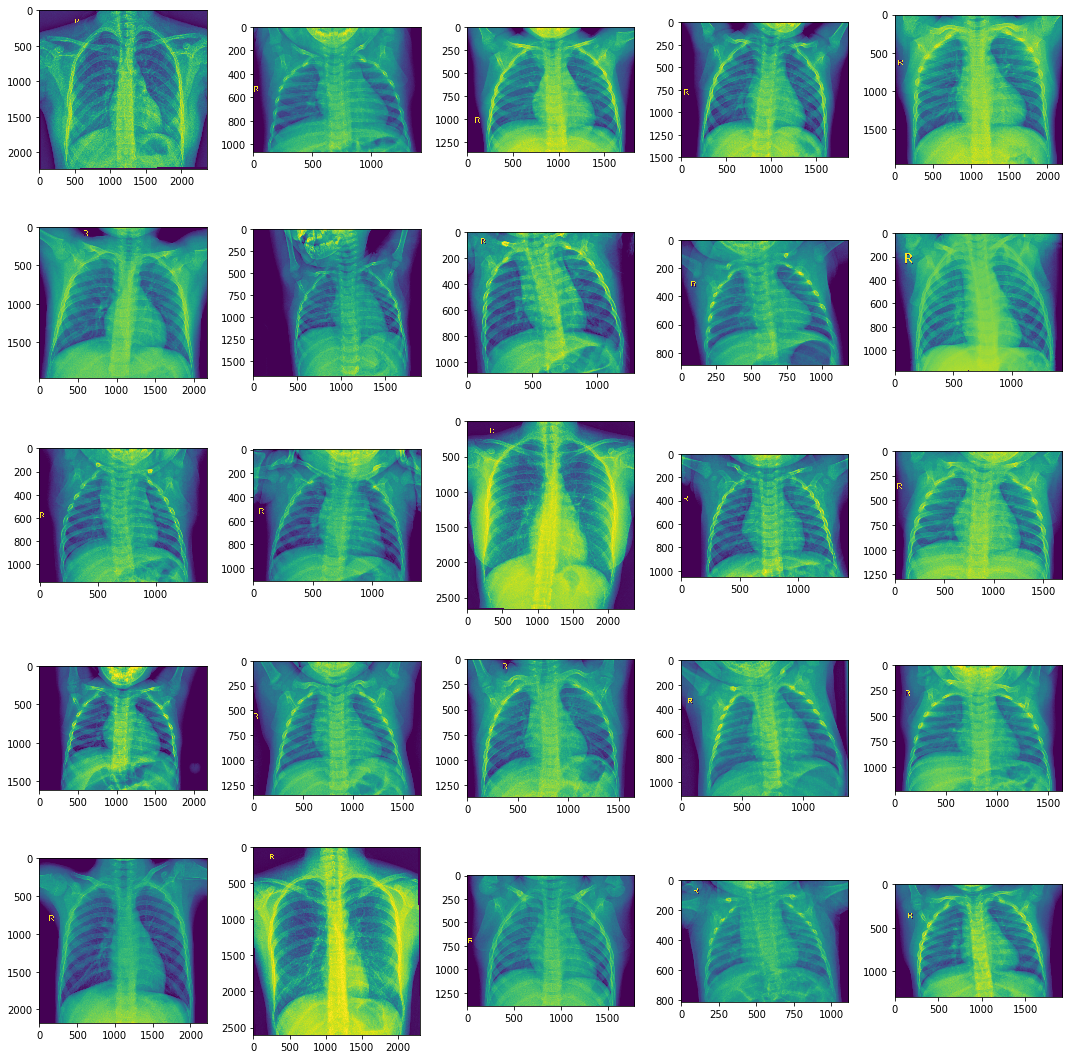

In [11]:
plotImg("/Users/stefanflorin/Downloads/chest_xray/train/NORMAL/")

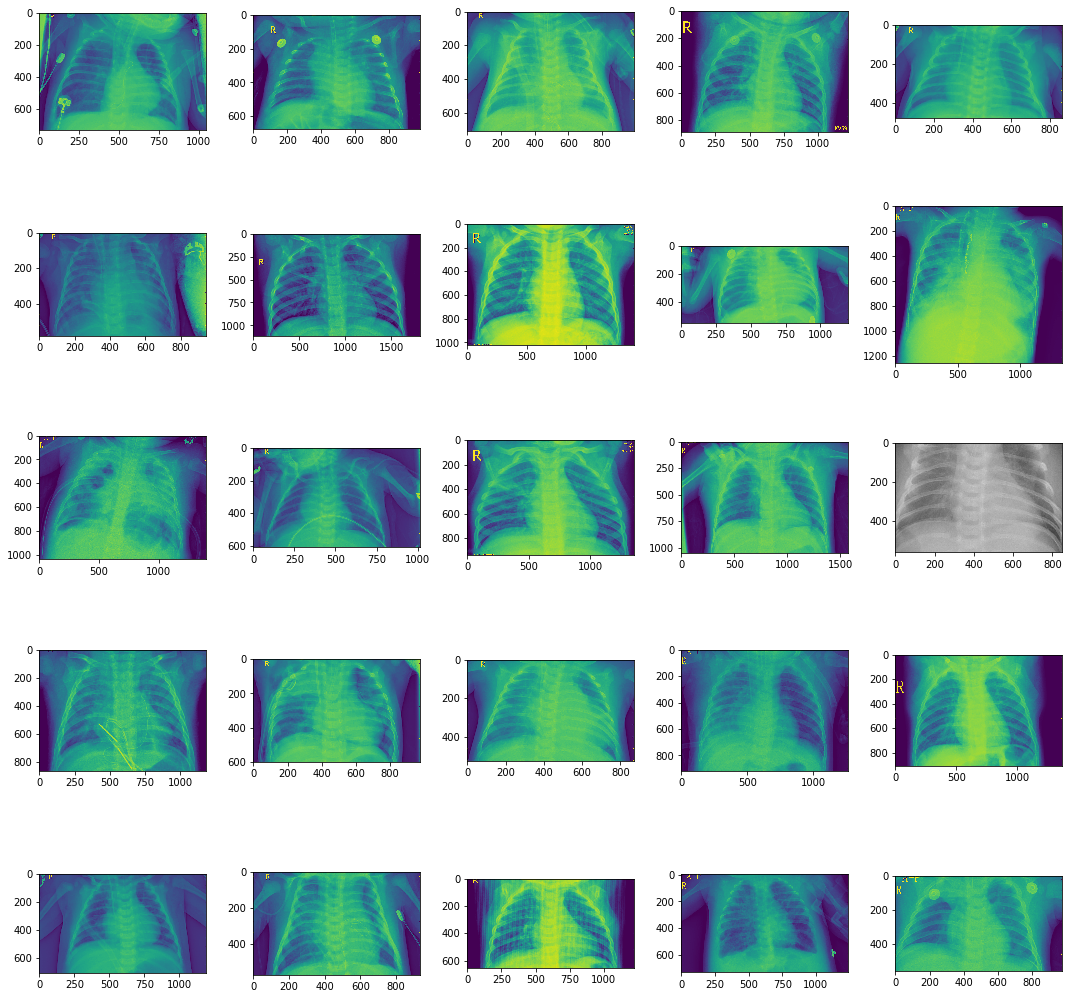

In [12]:
plotImg("/Users/stefanflorin/Downloads/chest_xray/train/PNEUMONIA/")

In [13]:
input_shape = (224, 224, 1)

def myModel(input_shape):
    model = Sequential ([
        Conv2D(128, (3,3), input_shape=input_shape),
        MaxPool2D((2,2)),
        
        Conv2D(32, (3,3), activation='relu'),
        MaxPool2D((2,2)),
        
        Flatten(),
        
        Dense(512, activation = 'relu'),
        Dropout(0.5),
        
        Dense(128, activation = 'relu'),
        Dropout(0.5),
        
        Dense(2, activation='sigmoid')
    ])
    
    return model

In [14]:
model = myModel(input_shape)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 128)     1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      36896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               47776256  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

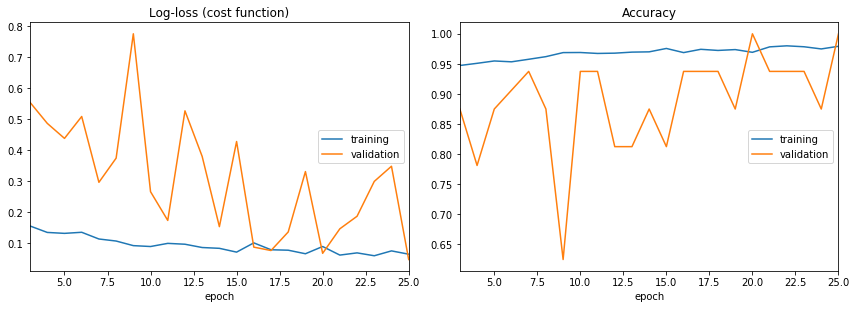

Log-loss (cost function):
training   (min:    0.060, max:    0.518, cur:    0.065)
validation (min:    0.048, max:    0.776, cur:    0.048)

Accuracy:
training   (min:    0.783, max:    0.980, cur:    0.979)
validation (min:    0.625, max:    1.000, cur:    1.000)


In [19]:
# model training

history = model.fit_generator(train_generator,
                   steps_per_epoch=100,
                   epochs = 25,
                   validation_data=validation_generator,
                   validation_steps=len(validation_generator),
                   verbose=1,
                   callbacks=[PlotLossesCallback()]
                   )

/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


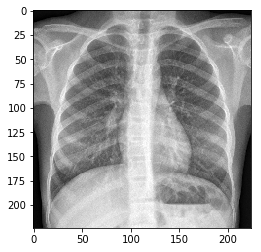

[[0.8861988  0.15346655]]
NORMAL


In [21]:
# TEST PREDICTION

original = load_img('/Users/stefanflorin/Downloads/chest_xray/test/NORMAL/IM-0033-0001-0002.jpeg', target_size=(224, 224), grayscale = True)
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis = 0)


processed_image = preprocess_input(image_batch.copy())
predictions = model.predict(processed_image)
result = np.argmax(predictions)
print(predictions)

if result == 0:
    print('NORMAL')
elif result == 1:
    print('PNEUMONIA')

In [ ]:
|